In [11]:
from google.colab import files
import gzip
import shutil
import pandas as pd

# Step 1: Upload your CSV from your PC
uploaded = files.upload()  # Select your metadata.csv file here

# Step 2: Get uploaded filename
for filename in uploaded.keys():
    print("Uploaded file:", filename)
input_file = filename  # this is now in Colab's current folder

# Step 3: Compress it to .gz in Colab
output_file = 'metadata.csv.gz'
with open(input_file, 'rb') as f_in:
    with gzip.open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Compression done! File saved as", output_file)

# Step 4: Read in chunks (example: 100 rows per chunk)
chunksize = 100
chunks = pd.read_csv(output_file, compression='gzip', chunksize=chunksize)

for chunk in chunks:
    print(chunk.head())
    break  # process only the first chunk for testing


Saving metadata.csv to metadata.csv
Uploaded file: metadata.csv
Compression done! File saved as metadata.csv.gz
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid  pub

In [12]:
#Data Loading & Exploration
# Part 1: Load and Explore Data
import pandas as pd

# Load the metadata (use nrows for faster testing if dataset is big)
df = pd.read_csv("metadata.csv", nrows=50000)  # adjust as needed

# Look at first rows
print(df.head())

# Dimensions
print("Shape:", df.shape)

# Info about data types
print(df.info())

# Missing values
print(df.isnull().sum())

# Basic statistics (only numeric columns)
print(df.describe())


/tmp/ipython-input-702845147.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv", nrows=50000)  # adjust as needed


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [13]:
#Data Cleaning and Preparation
# Handle missing values
# Example: drop rows with missing 'title' or 'publish_time'
df_clean = df.dropna(subset=["title", "publish_time"])

# Convert publish_time to datetime
df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")

# Extract year
df_clean["year"] = df_clean["publish_time"].dt.year

# Add abstract word count
df_clean["abstract_word_count"] = df_clean["abstract"].fillna("").apply(lambda x: len(x.split()))

print(df_clean[["title", "publish_time", "year", "abstract_word_count"]].head())


                                               title publish_time    year  \
0  Clinical features of culture-proven Mycoplasma...   2001-07-04  2001.0   
1  Nitric oxide: a pro-inflammatory mediator in l...   2000-08-15  2000.0   
2    Surfactant protein-D and pulmonary host defense   2000-08-25  2000.0   
3               Role of endothelin-1 in lung disease   2001-02-22  2001.0   
4  Gene expression in epithelial cells in respons...   2001-05-11  2001.0   

   abstract_word_count  
0                  262  
1                  142  
2                  219  
3                   68  
4                  110  


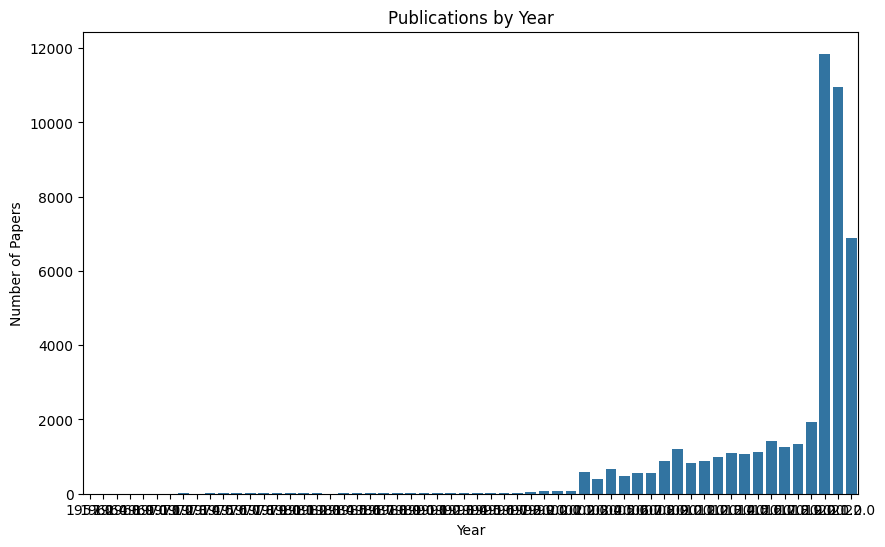

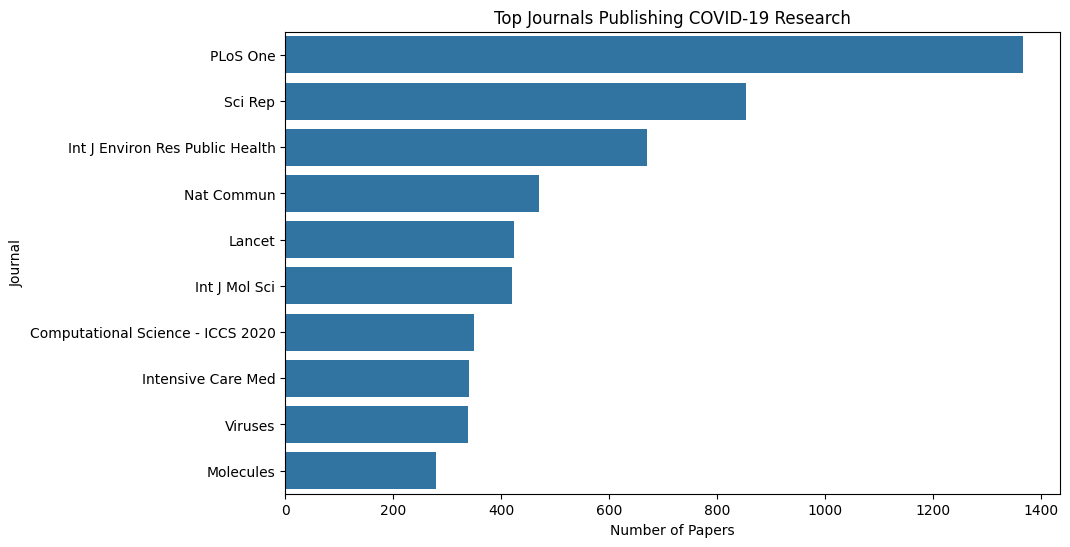

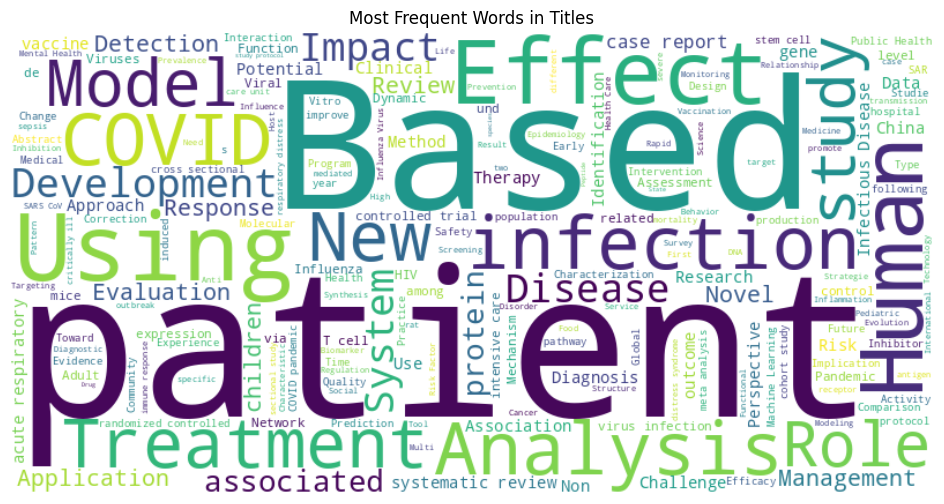

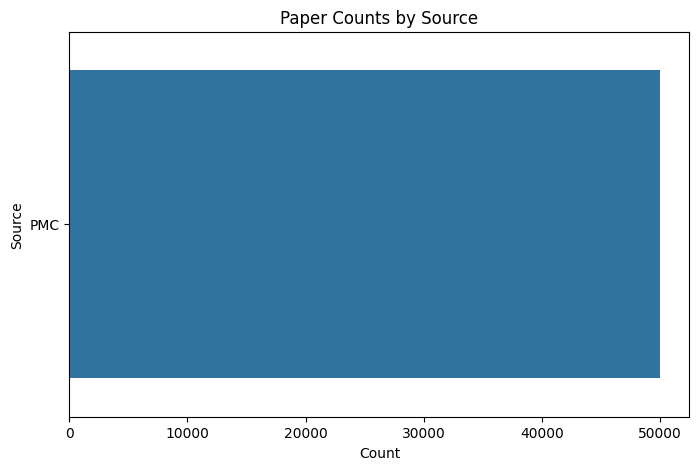

In [15]:
#Data Analysis & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Count papers by year
year_counts = df_clean["year"].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# 2. Top Journals
top_journals = df_clean["journal"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# 3. Word Cloud of Titles
text = " ".join(df_clean["title"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Titles")
plt.show()

# 4. Distribution of Sources
source_counts = df_clean["source_x"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(y=source_counts.index, x=source_counts.values)
plt.title("Paper Counts by Source")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()


In [17]:
!pip install streamlit
!pip install wordcloud seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.3 MB/s eta 0:00:00


/tmp/ipython-input-2124081743.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv", nrows=50000)
2025-09-17 12:37:39.968 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 12:37:40.145 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-17 12:37:40.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 12:37:40.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 12:37:40.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-17 12:37:40.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in 

DeltaGenerator()

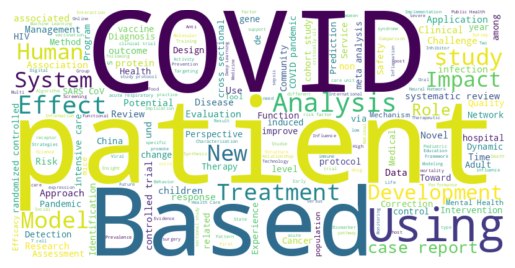

In [18]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load data
df = pd.read_csv("metadata.csv", nrows=50000)
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["year"] = df["publish_time"].dt.year

st.title("CORD-19 Data Explorer")
st.write("Simple exploration of COVID-19 research papers")

# Interactive year filter
min_year, max_year = int(df["year"].min()), int(df["year"].max())
year_range = st.slider("Select year range", min_year, max_year, (2020, 2021))
filtered = df[(df["year"] >= year_range[0]) & (df["year"] <= year_range[1])]

st.subheader("Sample Data")
st.write(filtered.head())

# Publications over time
st.subheader("Publications by Year")
year_counts = filtered["year"].value_counts().sort_index()
st.bar_chart(year_counts)

# Top Journals
st.subheader("Top Journals")
top_journals = filtered["journal"].value_counts().head(10)
st.bar_chart(top_journals)

# Word Cloud of Titles
st.subheader("Word Cloud of Titles")
text = " ".join(filtered["title"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")
st.pyplot(fig)
